# Frequentist Inference Case Study - Part B
<div style="text-align: right"><i><font size="2"> by: <a href="https://www.linkedin.com/in/sonjoy-das-9b323213/" target="_parent">Sonjoy Das, PhD</a></font></i></div>

***

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import bootstrap
from numpy.random import seed
from scipy.stats import ttest_ind
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
print(f" \nCount total NaN at each column in a medical DataFrame : \n\n {medical.isnull().sum()}")

 
Count total NaN at each column in a medical DataFrame : 

 age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64


> Great! There are no missing numbers.

__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

> __A1:__ See below.

In [5]:
medical_charges = medical["charges"].to_numpy() 
sample_mean_charge = np.mean(medical_charges)
print(f"The sample mean of medical charges is ${round(sample_mean_charge,3)}.")
sample_std_charge = np.std(medical_charges,ddof=1)
print(f"The sample standard deviation of medical charges is ${round(sample_std_charge,3)}")

The sample mean of medical charges is $13270.422.
The sample standard deviation of medical charges is $12110.011


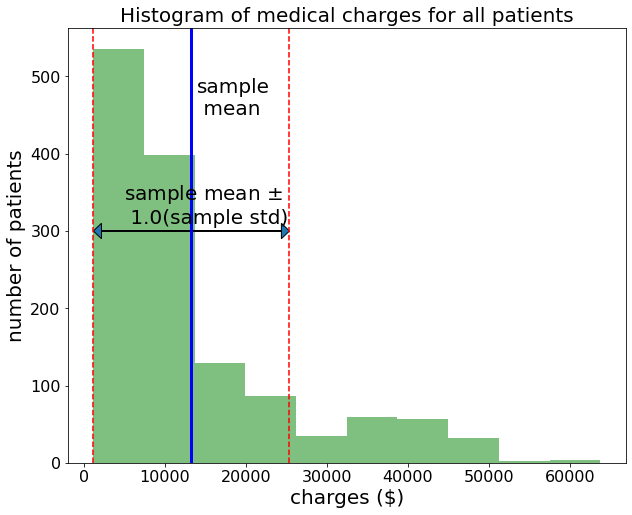

In [6]:
# medical.hist(column='charges');
plt.figure(figsize=(10, 8))
plt.hist(medical_charges,facecolor='g', alpha = 0.5)
plt.xlabel('charges ($)',fontsize=20)
plt.ylabel('number of patients',fontsize=20)
plt.title('Histogram of medical charges for all patients',fontsize=20)
plt.axvline(sample_mean_charge, color='b',linewidth=3)
plt.axvline(sample_mean_charge + sample_std_charge, color='r', linestyle='--')
plt.axvline(sample_mean_charge - sample_std_charge, color='r', linestyle='--')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.text(14000, 450, f"sample\n mean",fontsize=20)
plt.arrow(sample_mean_charge, 300, -sample_std_charge, 0, head_width=20, head_length=1000, length_includes_head=True)
plt.arrow(sample_mean_charge, 300, sample_std_charge, 0, head_width=20, head_length=1000, length_includes_head=True)
plt.text(5000,310,f"sample mean $\pm$\n 1.0(sample std)",fontsize=20);


In [7]:
print(f"The range defined by (sample mean ± sample std): {(round(sample_mean_charge - sample_std_charge,2), round(sample_mean_charge + sample_std_charge,2))}")

The range defined by (sample mean ± sample std): (1160.41, 25380.43)


In [8]:
n = len(medical_charges) # Sample size
print(f"Sample size: {n}")

Sample size: 1338


>Since the distribution is highly skewed to the right (non-normal), the sample mean (\\$13270.42) computed above is not a good representation of the central tendency. For the same reason, sample standard deviation is also not a good representation of spread of the data. Therefore, the typical range based on the mean and standard deviation shown above is not a good summary of medical charges. The samples in the right tail not only increases the sample mean but also the sample standard deviation, which gives an impression of rather wider variability in medical charges. Recall that standard deviation measures the average deiviation of the data from the mean. This means that a data point which which has large deviation from the mean will contribute significantly to the avegare deviation from the mean, resulting in higher standard deviation. For this data set of medical charges, the samples in the right tail region are responsible for giving an impression that the typical medical charges are higher than that they really are.

> The median can provide a better measure of central tendency and the range based on the first and third quartiles of the data can actually provide a better summary of the medical expenses because median and quartiles are not affectedd by the values of data points in the right tail region. Let's just check the median and the interquartile range (IQR) of the data. The IQR contains the middle 50\% of values when ordered from lowest to highest.

In [9]:
# Median or second quartile, Q2
median_charge = np.percentile(medical_charges, 50, method = 'midpoint')

# First quartile (Q1)
Q1 = np.percentile(medical_charges, 25, method = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(medical_charges, 75, method = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

print(f"Median charge: {median_charge}")
print()
print(f"(Q1, Q2): {Q1, Q3}")
print()
print(f"IQR: {Q3- Q1}")

Median charge: 9382.033

(Q1, Q2): (4742.3061, 16622.10758)

IQR: 11879.80148


> The median medical charge is only \\$9382.03 while the sample mean is \\$13270.42 which is significantly high.
>
> The middle 50\% of charges is in the range of (Q1, Q2) = (\\$4742.31, \\$16622.11) with IQR = \\$11879.80. In contrast, the sample standard deviation is \\$12110.01 which is slightly higher than the spread of the data measured by the IQR.

### What test? $z$-test, $t$-test, or bootstrap (non-parametric)?

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

>__A2:__ Before addressing the administrator's concern, let us recall when $z$-test, $t$-test, etc. are typically applicable.
>
> (**When $z$-test is appropriate**). Because of the [CLT](https://en.wikipedia.org/wiki/Central_limit_theorem), sample mean (or a test statistic), under fairly general conditions, is approximately normally distributed for **large samples** even if the data is not normally distributed. Therefore, many statistical tests can be conveniently performed as approximate $z$-test if the sample size, $n$, is large and the population variance, $\sigma^2$, is known. If $\sigma^2$ is unknown (and therefore has to be estimated from the sample itself) and the sample size, $n$, is not large, then the Student's $t$-test _may_ be more appropriate. If the sample size, $n$, is moderate or large, we can estimate the population variance as the (Bessel-corrected) sample variance and use it instead for $\sigma^2$. The resulting test will _not_ be an exact $z$-test since the uncertainty in the sample variance is not accounted for. However, it will be a good approximation by appealing to CLT unless the sample size, $n$, is small. A rule of thumb is that if $n > 30$, then we can apply $z$-test. Personally, I consider though that if $n > 100$, then we can get fairly accurate estimates of the mean (first moment) and variance (second moment) of scalar-valued random variable. So, if $n > 100$, we can apply $z$-test without much loss of accuracy for most practical applications.

> (**When $t$-test is _not_ appropriate, theoreticaly speaking**). On the other hand, a $t$-test is used when the following conditions are [met](https://en.wikipedia.org/wiki/Student%27s_t-test):
> * Sample mean, ${\bar{x}}$, follows a normal distribution $N(\mu,\sigma_{mean}^2)$ with its mean and variance, respectively, given by $\mu$ and $\sigma_{mean}^2 = \sigma^2 / n$.
> * If $s^2$ is used to denote the sample variance, then $s^2(n − 1)/\sigma^2$ follows a $\chi^2$ distribution with $n − 1$ degrees of freedom. 
> * The sample mean, $\bar{x}$, and the sample variance, $s^2$, are independent.
>
> If the data are precisely normally distributed, then the **first condition** is met, i.e., ${\bar{x}}\sim N(\mu,\sigma_{mean}^2)$. For our samples of medical charges, we are dealing with non-Gaussian data. If we consider a small sample size (say, $n < 30$), then the first condition will be violated. However, we have sufficiently large sample size, $n= 1338$. By CLT, $\bar{x}$ can, therefore, be very well approximated by a normal distribution. However, when the sample size is **small** and data are **precisely** normally distributed whose variance is not known to us, the uncertainty in the sample variance can be accounted for in the $t$-test procedure. In such case, $t$-test would be more appropriate.
>
> The **second condition** is met when the data used to estimate $s^2$ come from independent and identically distributed normal random variable. This condition is not met since our data of medical charges come from non-Gaussian distribuiton.
>
> The **third condition**, that the sample mean and sample variance need to be independent, is a characteristic of the normal distribution – no other distribution has this property ([Basu's theorem](https://en.wikipedia.org/wiki/Basu%27s_theorem); also see [this](https://statisticaloddsandends.wordpress.com/2019/08/25/proof-that-sample-mean-is-independent-of-sample-variance-under-normality/)). Considering all the conditions in the context of our medical charges, the $t$-test, theoretically speaking, is _not_ appropriate to test if the actual average charge has fallen below \\$12,000 or not. 

> (**When $t$-test _may_ be still applicable**). When the above three conditions are met, then the $t$-statistic, defined by ${\displaystyle {\frac {{\bar {x}}-\mu }{s/{\sqrt {n}}}}}$, has a Student's $t$-distribution with ${\displaystyle n-1}$ degrees of freedom. The three conditions are, however, very stringent requirements. When the three conditions are not satisfied, then the CLT can come to our rescue if the sample size _is_ moderate or large enough. By the CLT (i.e., for large sample size), if samples of the population data are independent and the population second moment (variance) exists, then the $t$-distribution can very well be approximated by normal distribution $N(0,1)$. In particular, when the degrees of freedom, given by $(n-1)$, of the $t$-distribution is greater than 30, then the $t$-distribution and normal distribuiton (associated with $z$-score) are almost identical. See further details [here](https://en.wikipedia.org/wiki/Student%27s_t-distribution). Therefore, for large sample sizes (say, $n>100$), the $t$-test and $z$-test procedures provide almost identical result. 
>
> Note though that for _small_ sample size and when the above three conditons _are_ met (while the population variance $\sigma^2$ is unknown and needs to be estimated from data of small sample size), then the $t$-distribution is significantly different from the normal distribution. In this case, the $z$-test procedure **cannot** be used and we must use $t$-test because the uncertainty in the sample variance (estimated from the data of small sample size) must be accounted for appropriately. This is the reason why confidence interval based on $t$-statistic is wider than the confidence interval based on $z$-score. We have already seen this in `Frequentist Inference Case Study - Part A`.

> (**When neither $z$-test nor $t$-test can be used**). However, for _small_ sample size and when the above three conditions are _not_ met, the $t$-test procedure is _not_ appropriate. **This is in contrary to what is often recommended in the literature and in practice.** This would be particularly true when we deal with non-Gaussian samples and have  small sample size. Neither $t$-test nor $z$-test would be meaningful then. For small sample size with non-Gaussian data, we may attempt to derive the sampling distribution of the test statistic, such as sample mean, by other means (such as anlytical derivation in some special cases) if possible. If analytical derivation becomes intractable, then some advanced computatinal statistical technique, such as, **bootstrap technique** or Markov Chain Monte Carlo may be considered. But, thhere is no guarantee that any of the methods will work if sample size _is_ small. 

> (**Conclusion**). Therefore, to answer **Q2** above, **we can use either $t$-test or $z$-test** because we have sufficiently large sample size, i.e., $n$ = 1338. We will numerically show below that there is practically no difference between $t$-test and $z$-test for random sample of charges when we have large sample size.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

> __A3:__ The administrator is concerned and thinks that the actual average charge has fallen below \\$12,000. He/she is concerned because the low average of medical charge can cause serious business problem to successfully run hospital's operations. To address this concern, we need to estimate the one-sided confidence interval, in particular, the **upper one-sided confidence interval** for the true mean of medical charges. As mentioned in response to Q2, we can use either $t$-test or $z$-test because we have sufficiently large sample size, i.e., $n$ = 1338.
>
> #### $z$-test:
>
> If we denote the true mean of medical charges by $\mu$, then the upper one-sided confidence interval is given by,
> ${\displaystyle {\mu \ge {\bar {x}} - {z_{1-\alpha}}{\frac{s}{\sqrt {n}}} }}$. In this case, the confidence interval is referred as the ${\displaystyle {100 (1-\alpha)\% }}$ confidence interval depending on the value of $\alpha$ chosen (say, $\alpha = 0.05$ for 95\% confidence interval). Here, $\alpha$ is called the level of significance and $z_{(1-\alpha)}$ is the critical value or $z$-score for one-sided confidence interval (for two-sided confidence interval, $z_{1-\alpha/2}$ must be taken as the critical value). 
>
> Thus, if the lower bound, ${\displaystyle { {\bar {x}} - {z_{1-\alpha}}{\frac{s}{\sqrt {n}}} }}$, of the upper one-sided confidence interval is found to be more than \\$12,000, then we can assure the administrator that actual average of the medical charges has **not** fallen below \\$12,000 based on ${\displaystyle {100 (1-\alpha)\% }}$ confidence interval.
>
> Let's estimate the $95\%$ upper one-sided confidence interval (for $\alpha = 0.05$ level of significance) below.


In [10]:
# Write a function to compute the z-score and upper one-sided confidence interval
# for a random sample

def mean_upper_CI_z_score(data, confidence_level=0.95):
    n = len(data)
    mean_data = np.mean(data)
    std_data = np.std(data,ddof=1)
    
    alpha = (1-confidence_level) # One-sided confidence interval
    z_score = norm.ppf(confidence_level)
    SE = std_data/np.sqrt(n)
    ME = z_score*SE
    
    l_lim = round(mean_data-ME,2)

    return mean_data, std_data, round(z_score,2), SE, ME, l_lim, confidence_level, alpha


# Write a function to print the output of the function mean_onesided_CI_z_score() 
# and also the output of mean_onesided_CI_t_score() -- see Cell 17.

def print_result(mean_data, std_data, z_score, SE, ME, l_lim, confidence_level, alpha):
    print(f"\t Sample mean: {mean_data}")
    print(f"\t Sample standard deviation: {std_data}")
    print(f"\t Critical z-score or t-score: {z_score}")
    print(f"\t Standard error: {SE}")
    print(f"\t Margin of error: {ME}")
    print(f"\t Lower limit of the upper one-sided {int(confidence_level*100)}% confidence interval: {l_lim}")
    print(f"\t Level of significance: {round(alpha,4)}")
    print()


# Write a function to plot the normal pdf (to be used to plot normal distribution of 
# test statistic)

def plot_normal_pdf(mean,std,xlabel,ylabel,title,xlim="",linestyle = "", color=""):
    x_min = norm.ppf(0.00001,mean,std) # Choose a reasonable lower limit
    x_max = norm.ppf(0.99999,mean,std) # Choose a reasonable upper limit
    ptx = np.linspace(x_min, x_max, 100)
    pty = norm.pdf(ptx,mean,std)
    if not color:
        color='black'
    if not linestyle:
        linestyle = '-'
        
    plt.plot(ptx, pty, lw=2,ls=linestyle,alpha=1.0,color=color)
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title,fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    if xlim:
        plt.xlim(xlim)
        
    return x_min, x_max

In [11]:
# Write a function to superimpose one-sided confidence interval on the pdf of 
# test statistic
def plot_confidence_interval(y_position,l_lim,u_lim):
#    Plot the CI
    plt.plot((l_lim,u_lim),(y_position,y_position),'o--',color='orange');

Sample size: 1338
	 Sample mean: 13270.422265141257
	 Sample standard deviation: 12110.011236694001
	 Critical z-score or t-score: 1.64
	 Standard error: 331.0674543156824
	 Margin of error: 544.557502996741
	 Lower limit of the upper one-sided 95% confidence interval: 12725.86
	 Level of significance: 0.05



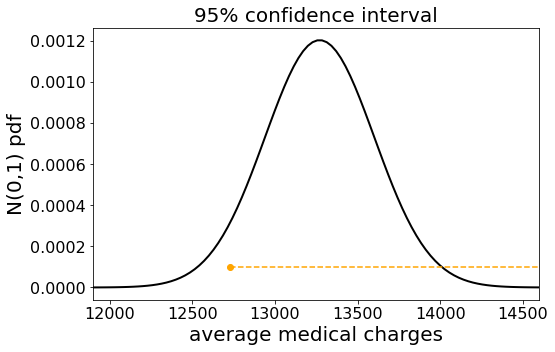

In [12]:
confidence_level = 0.95

# Estimate z-score, confidence interval, and other related quantities
sample_mean_charge, sample_std_charge, z_score, SE, ME, l_lim, confidence_level, alpha = mean_upper_CI_z_score(medical_charges,confidence_level=confidence_level)

# Print the results
print(f"Sample size: {n}")
print_result(sample_mean_charge, sample_std_charge, z_score, SE, ME, l_lim, confidence_level, alpha)

# Plot the normal sampling distribution and one-sided confidence interval
xlabel = f"average medical charges"
ylabel = f"N(0,1) pdf"
title = f"{int(confidence_level*100)}% confidence interval"
xlim = [11900, 14600]

# Plot the normal pdf of test statistic
plt.figure(figsize=(8, 5))
x_min, x_max = plot_normal_pdf(sample_mean_charge,SE,xlabel,ylabel,title,xlim=xlim)

# Superimpose the confidence interval 
plot_confidence_interval(0.0001,l_lim,x_max)

> Another way to **directly** estimate the lower limit of the upper one-sided ${\displaystyle{100 (1-\alpha)\% }}$ confidence interval is by using `norm.ppf()` function of `scipy.stats` library as below by explicitly specifying the `loc` (mean) and `scale` (standard deviation) parameters.

In [13]:
# To verify, directly compute the lower limit of the upper one-sided confidence
# interval by using norm.ppf()

print(f"\t Lower limit of the one-sided {int(confidence_level*100)}% upper confidence interval: {round(norm.ppf(1-confidence_level,loc=sample_mean_charge,scale=SE),2)}")

	 Lower limit of the one-sided 95% upper confidence interval: 12725.86


> Great, we got the same lower limit as \\$12725.86. 
>
> **Since the lower limist is more than \\$12000, administrator's concern is not justified.**

> #### $t$-test:
> Let's now also estimate the upper one-sided confidence interval (for $\alpha = 0.01$ level of significance) based on $t$-test. This is defined by ${\displaystyle {\mu \ge {\bar {x}} - {t_{1-\alpha,n-1}}{\frac{s}{\sqrt {n}}} }}$. Here, $t_{1-\alpha,n-1}$ is the $t$-statistic given by ${\displaystyle {\frac {{\bar {x}}-\mu }{s/{\sqrt {n}}}}}$,  $\alpha$ is the level of significance for ${\displaystyle {100 (1-\alpha)\% }}$ confidence level and $n-1$ is the degrees of freedom of the $t$-distribution that characterizes the $t$-statistic.

In [14]:
# Write a function to compute the t-score and one-sided confidence interval
# for a random sample

def mean_upper_CI_t_score(data, confidence_level=0.95):
    n = len(data)
    mean_data = np.mean(data)
    std_data = np.std(data,ddof=1)
    
    alpha = (1-confidence_level) # One-sided confidence interval
    t_score = t.ppf(confidence_level, n-1)
    SE = std_data/np.sqrt(n)
    ME = t_score*SE
    
    l_lim = round(mean_data-ME,2)

    return mean_data, std_data, round(t_score,2), SE, ME, l_lim, confidence_level, alpha


# Write a function to plot the t-pdf (to be used to plot pdf of t-distribution of 
# test statistic)
def plot_t_distribution_pdf(df,loc,scale,xlabel="",ylabel="",title="",xlim="",color="",linestyle=""):
    x_min = t.ppf(0.00001,df,loc,SE) # Choose a reasonable lower limit
    x_max = t.ppf(0.99999,df,loc,SE) # Choose a reasonable upper limit
    ptx = np.linspace(x_min, x_max, 100)
    pty = t.pdf(ptx,df,loc,SE)
    if not color:
        color='black'
    if not linestyle:
        linestyle='-'
        
    plt.plot(ptx, pty, ls=linestyle, lw=2, alpha=1.0,color=color)
    
    if xlabel:
        plt.xlabel(xlabel,fontsize=20)
    if ylabel:
        plt.ylabel(ylabel, fontsize=20)
    if title:
        plt.title(title,fontsize=20)
        
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    if xlim:
        plt.xlim(xlim)
    
    return x_min, x_max

Sample size: 1338
	 Sample mean: 13270.422265141257
	 Sample standard deviation: 12110.011236694001
	 Critical z-score or t-score: 1.65
	 Standard error: 331.0674543156824
	 Margin of error: 544.9350813250254
	 Lower limit of the upper one-sided 95% confidence interval: 12725.49
	 Level of significance: 0.05



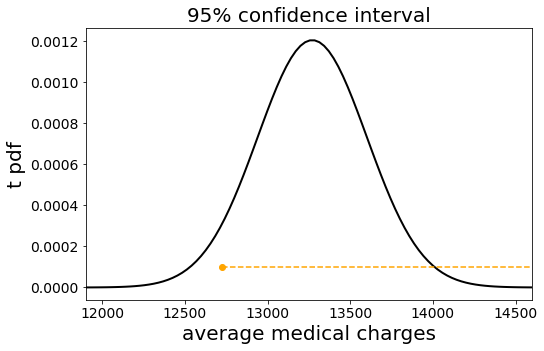

In [15]:
# Estimate t-score, confidence interval, and other related quantities
sample_mean_charge, sample_std_charge, t_score, SE, ME, l_lim, confidence_level, alpha = mean_upper_CI_t_score(medical_charges,confidence_level=confidence_level)

# Print the results
print(f"Sample size: {n}")
print_result(sample_mean_charge, sample_std_charge, t_score, SE, ME, l_lim, confidence_level, alpha)

# Plot the t-distribution of the test statistic and one-sided confidence interval
df = n-1
loc = sample_mean_charge
scale = SE
xlabel = f"average medical charges"
ylabel = f"t pdf"
title = f"{int(confidence_level*100)}% confidence interval"
xlim = [11900, 14600]

# Plot the t-distribution of test statistic
plt.figure(figsize=(8, 5))
x_min, x_max = plot_t_distribution_pdf(df,loc,scale,xlabel,ylabel,title,xlim=xlim)

# Superimpose the confidence interval 
plot_confidence_interval(0.0001,l_lim,x_max)

> Similar to the use of `norm.ppf()` function from the `scipy.stats` library for normal distribution, we can also **directly** compute the lower limit of the upper one-sided ${\displaystyle{100 (1-\alpha)\% }}$ confidence interval by using `t.ppf()` function from the `scipy.stats` library by explicitly specifying the `loc` and `scale` parameters.

In [16]:
# To verify, directly compute the lower limit of the upper one-sided confidence
# interval by using t.ppf()

print(f"\t Lower limit of the one-sided {int(confidence_level*100)}% upper confidence interval: {round(t.ppf(1-confidence_level,n-1,loc=sample_mean_charge,scale=SE),2)}")

	 Lower limit of the one-sided 95% upper confidence interval: 12725.49


> Nice! We got the same lower limit by using the two slightly different snippets of code. In $t$-test, we obtained lower limit of a one-sided 95% upper confidence interval as \\$12725.49 which is also more than \\$12000. **Thus, the administrator should not have any concern.**

> The critical score and the lower limits of the one-sided 95\% upper confidence intervals based on $z$-test and $t$-test are tabulated below.

|                             | $z$-test    | $t$-test    |
|-----------------------------| ----------- | ----------- |
| Critical score              | 1.64        | 1.65        |
| Lower limit of 95\% upper CI| \\$12,725.86| \\$12,725.49|

> The lower limit based on $t$-score is slightly less than the limit based on $z$-score. This is consistent with what we remarked earlier because confidence interval based on $t$-score will be wider. The slight difference is, however, practically insignificant and the two limits are essentially same for all practical purposes!
>
> We, thus, numerically show that there is practically no difference between  $t$-test and $z$-test for random sample of medical charges because we have sufficiently large sample size, i.e., $n=1338$.

### What if we would have small sample of medical charges, say, `n_sample=20`?

> (**Bootstrap**). We will now numerically show that neither $z$-test nor $t$-test makes sense if the data are **non-Gaussian** _and_ the sample size is **small** (say, $n$ < 30). Since we do not have actual population density, we cannot estimate the sampling distribution of a test statistic (say, of sample mean). So, we would try another computational statistical technqie, namely, [bootstrap](https://www.statisticshowto.com/bootstrap-sample/) technique here to see how it might perform for small sample size. Bootstrapping is a type of resampling where large number of times (say, `n_resamples = 5000` times) a random sample is repeatedly drawn, with replacement, from the original data. The process generally follows three steps as explained in [scipy.stats.bootstrap](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html):
> * **Resample the data**: Take a random sample of the original sample (with replacement) of the same size as the original sample. Repeat it multiple times, say, `n_resamples = 5000` times.

> * **Estimate bootstrap distribution of a test statistic**: Calculate a test statistic (called a bootstrap statistic, say, _sample average_) for each of the resampled data. This will generate `n_resamples` values of bootstrap statistic. This set of values of bootstrap statistic characterizes the sampling distribution (called bootstrap distribution) of the test statistic.

> * **Determine standard error or/and confidence interval**: Use the `n_resamples` values of bootstrap statistic and estimate standard deviation of the bootstrap distribution (also called standard error (SE) of the test statistic). Also find the confidence interval of the bootstrap distribution that
> > * is symmetric about the median and
> > * contains `confidence_level` of the resampled statistic values.

>
> In our case, we will first take a small random sample of medical charges (say, of size `n_sample = 20`) from our larger sample of medical charges (of size `n=1338`). We will then pretend that this small random sample of size `n_sample` is only available to us and consider it as the original data which will then be passed on to the bootstrap algorithm described above to estimate the normalized histogram of _sample average_ for small random resampled data. There will be `n_resamples = 5000` of resampled data sets. Thus, `n_resamples = 5000` values of _sample average_ would be used to estimate the normalized histogram. The normalized histogram can be considered as the  sampling distribution, or the bootstrap distribution, of _sample average_ for small sample.
>
> To understand how this bootstrap distribution for small random sample compares with the classical normal distribution or $t$-distribution, we would superimpose the normal distribution and $t$-distribution on the normalized histogram. The normal distribution is characterized by `loc` and `scale` parameters, respectively, given by ${\bar{x}_{\mathrm{small}}}$ and ${\displaystyle\frac{s_{\mathrm{small}}}{\sqrt{n_{\mathrm{sample}}}}}$. Here ${\bar{x}_{\mathrm{small}}}$ and ${\displaystyle s_{\mathrm{small}}}$ represent, respectively, the sample average and standard deviation of the original small random sample used in the bootstrap technique. Similarly, the $t$-distribution, which has degrees of freedom given by $(n_{\mathrm{sample}}-1)$, is characterized by `loc` and `scale` parameters given by ${\bar{x}_{\mathrm{small}}}$ and ${\displaystyle\frac{s_{\mathrm{small}}}{\sqrt{n_{\mathrm{sample}}}}}$, respectively. All the three distribution (normal distribution, $t$-distribution, and bootstrap distribuiton) will look different from each other because we are now dealing with small samples (`n_sample = 20`) of non-Gaussian data.

In [17]:
# Write a function to randomly sample `n_sample` of `original_data`.
def random_charge_sampler(original_data,n_sample):
    return np.random.choice(original_data, n_sample)


In [18]:
# Define a function to plot the bootstrap distribuiton (normalized histogram) along
# with the corresponding normal distribution and t-distribution. Also, return the 
# sample average and standard error (SE) of bootstrap statistic computed in the process.

def plot_bootstrap_distribution(original_data,n_resamples,bins,xlabel,ylabel,xlim="",legend_loc="",random_seed = 0):
    
    # Generate samples of bootstrap statistics 
    seed(random_seed)
    n_sample = len(original_data) 
    sample_bootstrap_statistics = [np.mean(random_charge_sampler(original_data,n_sample)) for ii in range(n_resamples)]
    
    # Average and SE of bootstrap statistics 
    average_bootstrap_statistics = np.mean(sample_bootstrap_statistics)
    SE_bootstrap_statistics = np.std(sample_bootstrap_statistics,ddof=1)
    
    plt.figure(figsize=(8, 5))
    
    # Normalized histogram or bootstrap distribution of sample mean
    plt.hist(sample_bootstrap_statistics, bins=bins, density=True, facecolor='g', alpha = 0.6, label='bootstrap distribution')


    # For comparison, also plot the normal distribution.
    # First generate the average and SE for this purpose.
    # Estimate the small sample average and standard error.
    loc = np.mean(original_data)
    scale = np.std(original_data,ddof=1)/np.sqrt(len(original_data))
    
    x_min = norm.ppf(0.00001,loc,scale) # Choose a reasonable lower limit
    x_max = norm.ppf(0.99999,loc,scale) # Choose a reasonable upper limit
    ptx = np.linspace(x_min, x_max, 100)
    pty = norm.pdf(ptx,loc,scale)
    plt.plot(ptx, pty, 'k-', lw=2, alpha=1.0,label='normal distribution')

    # For comparison, also plot t-distribution
    x_min = t.ppf(0.0001,len(original_data)-1,loc,scale) # Choose a reasonable lower limit
    x_max = t.ppf(0.9999,len(original_data)-1,loc,scale) # Choose a reasonable upper limit
    ptx = np.linspace(x_min, x_max, 100)
    pty = t.pdf(ptx,len(original_data)-1,loc,scale)
    plt.plot(ptx, pty, 'b--', lw=2, alpha=1.0,label='t-distribution')

    if xlim:
        plt.xlim(xlim)
    
    if legend_loc:
        legend = plt.legend(loc=legend_loc, shadow=True, fontsize='x-large')
        
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel(ylabel,fontsize=20)
    plt.title(f" Sample size = {n_sample} and number of resamples = {n_resamples}",fontsize=15)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16);

    return average_bootstrap_statistics, SE_bootstrap_statistics, loc, scale

Sample size of random sample: 20
Number of resamples: 5000
	 Sample mean of bootstrap distribution : 16765.18
	 SE of bootstrap distribution : 3486.82

	 Sample mean of data of size 20 for z-test and t-test : 16728.93
	 SE of sample mean for z-test and t-test : 3497.73



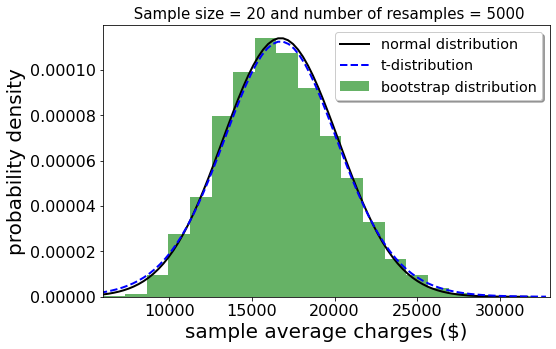

In [19]:
n_sample = 20
n_resamples=5000
bins=20
xlabel = 'sample average charges ($)'
ylabel = 'probability density'
xlim = [6000, 33000]
legend_loc = 'upper right'
random_seed = 0 # for bootstrapping

# Take a small sample data (n_sample = 20) of medical charges
seed(4)
small_sample_data1 = random_charge_sampler(medical_charges,n_sample)

# Estimate the sample mean and standard error of bootstrap distribution, and plot it 
# along with the corresponding normal distribution and t-distribution
average_charge, SE_charge, loc, scale = plot_bootstrap_distribution(small_sample_data1,n_resamples,bins,xlabel,ylabel,xlim=xlim,legend_loc=legend_loc,random_seed=random_seed)

print(f"Sample size of random sample: {n_sample}")
print(f"Number of resamples: {n_resamples}")
print(f"\t Sample mean of bootstrap distribution : {round(average_charge,2)}")
print(f"\t SE of bootstrap distribution : {round(SE_charge,2)}")
print()
print(f"\t Sample mean of data of size {n_sample} for z-test and t-test : {round(loc,2)}")
print(f"\t SE of sample mean for z-test and t-test : {round(scale,2)}")
print()

> **It should be noted that the three sampling distributions depend on random sample.** They are, therefore, simply representative and will change quantitatively if we choose a different `random_seed` (i.e., choose a different small sample data). 

Sample size of random sample: 20
Number of resamples: 5000
	 Sample mean of bootstrap distribution : 12545.65
	 SE of bootstrap distribution : 2877.71

	 Sample mean of data of size 20 for z-test and t-test : 12489.62
	 SE of sample mean for z-test and t-test : 2975.03



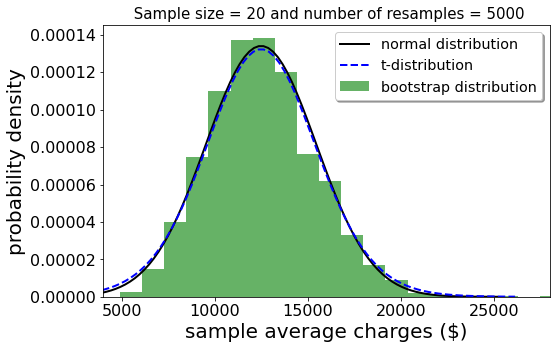

In [20]:
# Take another small sample data (n_sample = 20) of medical charges
seed(121)
small_sample_data2 = random_charge_sampler(medical_charges,n_sample)

# Estimate the sample mean and standard error of bootstrap distribution, and plot it 
# along with the corresponding normal distribution and t-distribution
xlim = [4000, 28000]
average_charge, SE_charge, loc, scale = plot_bootstrap_distribution(small_sample_data2,n_resamples,bins,xlabel,ylabel,xlim=xlim,legend_loc=legend_loc,random_seed=random_seed)

print(f"Sample size of random sample: {n_sample}")
print(f"Number of resamples: {n_resamples}")
print(f"\t Sample mean of bootstrap distribution : {round(average_charge,2)}")
print(f"\t SE of bootstrap distribution : {round(SE_charge,2)}")
print()
print(f"\t Sample mean of data of size {n_sample} for z-test and t-test : {round(loc,2)}")
print(f"\t SE of sample mean for z-test and t-test : {round(scale,2)}")
print()

> For each small sample data (`small_sample_data1` and `small_sample_data2`), we note that the sample means (respectively, sample standard errors) of all the three distributions are close to each other. But, sample mean (respectively, sample standard error) of `small_sample_data1` is significantly different from that of `small_sample_data2`. This significant difference is caused by uncertainy or variation across different realizations of small sample data. It is, however, qualitatively evident from both the pictures that the shapes of the normal distribution and $t$-distribution are different for small sample size (here, `n_sample = 20`), but they are symmetric about their respective means. On the other hand, the bootstrap distrbution is slightly right skewed. The bootstrap distrbution is constructed by resampling multiple times the small sample data and does not rely on any other assumptions (such as normality of the original data). It is likely to be the appropriate scheme to use for further analysis, say, to estimate standard error or confidence interval of the test statistic (sample mean). However, small sample size can still be a serious issue if the small sample data is not representative of the population data. Therefore, small sample size is always a challenging issue, and bootstrap technique and other statistical techniques may not still be useful. However, if we have moderate sample size, test based on bootstrap distribution is likely to outperform the $z$-test and $t$-test for non-Gaussian data.
>
> We will numerically illustrate the above fact below further by estimating confidence intervals (CIs) based on the three distributions and check what are the percentages of CIs for each of the distributions that contain the sample mean of large sample, i.e., `sample_mean_charge = $13270.42`, which is essentially acting here as population mean in the absence of actual population mean.

#### Confidence Intervals for small sample of medical charges (say, $n$=20)

> **(Compare $z$-test, $t$-test, and bootstrap).** Let us first calculate a _typical_ two-sided 95% confidence interval of sample mean (statistic) using normal distribution ($z$-test), $t$ distribution ($t$-test), and bootstrap distribuiton for sample size of `n_sample = 20`. We will then repeate the steps again by taking a little larger sample size, say, `n_sample = 50` to see how the different CIs perform.

In [21]:
# Write a function that will use a random sample `original_data` and estimate  
# two-sided confidence interval of sample mean based on normal distribution (z-test),
# t-distribution (t-test), and bootstrap distribuiton (resampling multiple times
# to generate bootstrap data of same size as the `original_data`)

def mean_confidence_interval(original_data,n_bootstrap_resamples,confidence_level=0.95,random_seed=0):
    
    # normal distrbution (z-test)
    n_sample = len(original_data)
    loc = np.mean(original_data)
    scale = np.std(original_data,ddof=1)/np.sqrt(n_sample)
    
    CI_z = norm.interval(alpha=confidence_level, loc=loc, scale=scale)
    print(f"Two-sided {int(confidence_level*100)}% confidence interval using norm.interval: {round(CI_z[0],2), round(CI_z[1],2)}")
    print(f"Length of confidence interval: {round(CI_z[1]-CI_z[0],2)}")
    print(f"The standard error for normal distribuiton: {round(scale,2)}")
    print()

    # t-distribution (t-test)
    CI_t = t.interval(alpha=confidence_level, df=n_sample-1, loc=loc, scale=scale)
    print(f"Two-sided {int(confidence_level*100)}% confidence interval using t.interval: {round(CI_t[0],2), round(CI_t[1],2)}")
    print(f"Length of confidence interval: {round(CI_t[1]-CI_t[0],2)}")
    print(f"The standard error for t-distribuiton: {round(scale,2)}")    
    print()

    # Similarly, estimate the bootstrap confidence interval
    # medical_charges = (medical_charges,)  # put samples in a sequence to compute bootstrap confidence interval
    res = bootstrap((original_data,), np.mean, confidence_level=confidence_level,n_resamples=n_bootstrap_resamples,random_state=random_seed)
    CI_bootstrap = res.confidence_interval
    print(f"Two-sided {int(confidence_level*100)}% confidence interval using bootstrap: {round(CI_bootstrap[0],2),round(CI_bootstrap[1],2)}")
    print(f"Length of confidence interval: {round(CI_bootstrap[1]-CI_bootstrap[0],2)}")
    print(f"The bootstrap standard error: {round(res.standard_error,2)}")

In [22]:
# Estimate typical confidence interval for each of the distributions
mean_confidence_interval(small_sample_data1,n_resamples,confidence_level=confidence_level,random_seed=random_seed)

Two-sided 95% confidence interval using norm.interval: (9873.51, 23584.35)
Length of confidence interval: 13710.85
The standard error for normal distribuiton: 3497.73

Two-sided 95% confidence interval using t.interval: (9408.1, 24049.76)
Length of confidence interval: 14641.66
The standard error for t-distribuiton: 3497.73

Two-sided 95% confidence interval using bootstrap: (11101.0, 25074.15)
Length of confidence interval: 13973.14
The bootstrap standard error: 3486.82


**Let's do it also for another small sample data.**

In [23]:
# Estimate typical confidence interval for each of the distributions for the other small sample data
mean_confidence_interval(small_sample_data2,n_resamples,confidence_level=confidence_level,random_seed=random_seed)

Two-sided 95% confidence interval using norm.interval: (6658.67, 18320.58)
Length of confidence interval: 11661.91
The standard error for normal distribuiton: 2975.03

Two-sided 95% confidence interval using t.interval: (6262.81, 18716.44)
Length of confidence interval: 12453.63
The standard error for t-distribuiton: 2975.03

Two-sided 95% confidence interval using bootstrap: (8041.68, 19687.4)
Length of confidence interval: 11645.72
The bootstrap standard error: 2877.71


> As remarked earlier in the context of sampling distributions, confidence interval and standard error obtained above depend on random sample. The output, therefore, will vary when we choose different small sample data, as we see above for two different samples.
>
> The bootstrap standard errors above (3486.82 and 2877.71) obtained by using the output, `res.standard_error`, of `scipy.stats.bootstrap()` function match perfectly with what we obtained earlier in _Cell 18_ and _Cell 19_ by estimating them directly using the `np.std()` function on `n_resamples = 5000` values of _sample average_.

> Nest, we will take `n_trials =10000` random small samples (`small_sample_data1`,...,`small_sample_data10000`) and estimate two-sided 95\% confidence interval using `norm.interval`, `t.interval`, and bootstrap technique to see if the 95% confidence interval contains the `sample_mean_charge = $13270.42` approximately 9500 times. This numerical illustration will illustrate which test ($z$-test, $t$-test, or non-parametric bootstrap scheme) performs best.

In [24]:
# Write a function to validate the confidence interval for small sample of non-Gaussian data

def validate_confidence_interval(population_data_dist,true_popu_para,n_sample,n_trials,n_bootstrap_resamples,confidence_level=0.95,random_seed=0):    

    seed(random_seed) # To control the randomness of norm.interval and t.interval
    
    # normal distribution
    CI_contains_true_popu_para = 0
    for i in range(n_trials):
        small_sample_data = random_charge_sampler(population_data_dist,n_sample)
        CI = norm.interval(alpha=confidence_level, loc=np.mean(small_sample_data), scale=np.std(small_sample_data,ddof=1)/np.sqrt(n_sample))
        if CI[0] < true_popu_para < CI[1]:
            CI_contains_true_popu_para += 1
        
    print(f"z-test: Two-sided {int(confidence_level*100)}% confidence interval contains the true population parameter (= {round(true_popu_para,2)}) only {CI_contains_true_popu_para} times out of {n_trials} times")
    print()

    # t-distribution
    CI_contains_true_popu_para = 0
    for i in range(n_trials):
        small_sample_data = random_charge_sampler(population_data_dist,n_sample)
        CI = t.interval(alpha=confidence_level, df=n_sample-1, loc=np.mean(small_sample_data), scale=np.std(small_sample_data,ddof=1)/np.sqrt(n_sample))
        if CI[0] < true_popu_para < CI[1]:
            CI_contains_true_popu_para += 1

    print(f"t-test: Two-sided {int(confidence_level*100)}% confidence interval contains the true population parameter (= {round(true_popu_para,2)}) only {CI_contains_true_popu_para} times out of {n_trials} times")
    print()

    #  bootstrap distribution
    CI_contains_true_popu_para = 0
    for i in range(n_trials):
        small_sample_data = random_charge_sampler(population_data_dist,n_sample)
        CI_bootstrap = bootstrap((small_sample_data,), np.mean, confidence_level=confidence_level,n_resamples=n_bootstrap_resamples,random_state=random_seed).confidence_interval
        if CI_bootstrap[0] < true_popu_para < CI_bootstrap[1]:
            CI_contains_true_popu_para += 1

    print(f"Bootstrap: Two-sided {int(confidence_level*100)}% confidence interval contains the true population parameter (= {round(true_popu_para,2)}) only {CI_contains_true_popu_para} times out of {n_trials} times")

In [25]:
n_trials = 100
random_seed = 41 # for bootstrapping
population_data_dist = medical_charges # Pass the full dataset of medical charges of 
                                    # size 1338 from which several sets of small sample
                                    # data of size n_sample = 20 will be random sampled
true_popu_para = sample_mean_charge

# Now call the funciton to validate the confidence interval
validate_confidence_interval(population_data_dist,true_popu_para,n_sample,n_trials,n_resamples,confidence_level,random_seed)

z-test: Two-sided 95% confidence interval contains the true population parameter (= 13270.42) only 92 times out of 100 times

t-test: Two-sided 95% confidence interval contains the true population parameter (= 13270.42) only 90 times out of 100 times

Bootstrap: Two-sided 95% confidence interval contains the true population parameter (= 13270.42) only 96 times out of 100 times


The percetntage of confidence intervals that will contain ` sample_mean_charge` will change as we choose another 1000 random small samples by choosing a different `random_seed`. Let's call the function again with a different `random_seed`.

In [26]:
random_seed = 147
validate_confidence_interval(population_data_dist,true_popu_para,n_sample,n_trials,n_resamples,confidence_level,random_seed)

z-test: Two-sided 95% confidence interval contains the true population parameter (= 13270.42) only 88 times out of 100 times

t-test: Two-sided 95% confidence interval contains the true population parameter (= 13270.42) only 92 times out of 100 times

Bootstrap: Two-sided 95% confidence interval contains the true population parameter (= 13270.42) only 97 times out of 100 times


**For small sample size, none of distribuiton provides proper confidence inetrvals** because the 95\% two sided confidence interval should have contained the `sample_mean_charge` approximately 9500 times out of 10000 times. Let's us increase the sample size, `n_sample`, to 50 and to 300 to see how the three different confidence intervals perform.

In [27]:
n_sample = 50
validate_confidence_interval(population_data_dist,true_popu_para,n_sample,n_trials,n_resamples,confidence_level,random_seed)

z-test: Two-sided 95% confidence interval contains the true population parameter (= 13270.42) only 92 times out of 100 times

t-test: Two-sided 95% confidence interval contains the true population parameter (= 13270.42) only 94 times out of 100 times

Bootstrap: Two-sided 95% confidence interval contains the true population parameter (= 13270.42) only 94 times out of 100 times


One more time with a different `random_seed`.

In [28]:
random_seed = 100
validate_confidence_interval(population_data_dist,true_popu_para,n_sample,n_trials,n_resamples,confidence_level,random_seed)

z-test: Two-sided 95% confidence interval contains the true population parameter (= 13270.42) only 97 times out of 100 times

t-test: Two-sided 95% confidence interval contains the true population parameter (= 13270.42) only 94 times out of 100 times

Bootstrap: Two-sided 95% confidence interval contains the true population parameter (= 13270.42) only 94 times out of 100 times


In [29]:
n_sample = 300
validate_confidence_interval(population_data_dist,true_popu_para,n_sample,n_trials,n_resamples,confidence_level,random_seed)

z-test: Two-sided 95% confidence interval contains the true population parameter (= 13270.42) only 97 times out of 100 times

t-test: Two-sided 95% confidence interval contains the true population parameter (= 13270.42) only 91 times out of 100 times

Bootstrap: Two-sided 95% confidence interval contains the true population parameter (= 13270.42) only 93 times out of 100 times


Another time with a different `random_seed`.

In [30]:
random_seed = 21
validate_confidence_interval(population_data_dist,true_popu_para,n_sample,n_trials,n_resamples,confidence_level,random_seed)

z-test: Two-sided 95% confidence interval contains the true population parameter (= 13270.42) only 95 times out of 100 times

t-test: Two-sided 95% confidence interval contains the true population parameter (= 13270.42) only 96 times out of 100 times

Bootstrap: Two-sided 95% confidence interval contains the true population parameter (= 13270.42) only 96 times out of 100 times


> This numerical exercise demonstrates that if small sample is not representative of the population data, then none of the three distributions (normal distribution, $t$-distribution, and bootstrap distribution) can provide reliable CIs. As we increase the sample size from small to moderate (say, n_sample = 50), the $t$-test and bootstrap test provide better results than $z$-test, with bootstrap test having a slight edge over the $t$-test. When we consider large sample size (say, n_sample = 300), then all the three tests are likely to yield reliable 95\% confidence interval.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

> __A4:__ Here, the administrator wants to know whether people with insurance really are charged a different amount to those without. It can be answered by investigating if the distributions of medical expenses for people with insurance and that without insurance are significantly different. A very simple and smart way to check this is to compare the central tendency of populations. Therefore, a standard approach here is to check if the sample means of the two data sets (one with insurance and the other without insurance) are different. A cautionary note here is that this can be  misleading because there is almost always a slight difference between means of two **finite** sample sets. This is true even if the two sets come from the same population. It is, therefore, more meaningful to estimate this difference in means as some sort of _range_ (which can account for uncertainty). In particular, if we can estimate the probability of this difference and check if the estimated probability is significant enough to be of any practical importance.The $t$-test for difference in means checks if the difference is **close enough** to zero by estimating the confidence interval of difference in means.
>
> Let us put everything formally together. Since $\bar{x}_0$ and $\bar{x}_1$ represent, respectively, the sample mean of medical expenses of people with insurance and without insurance, then we can state the $t$-test hypothesis as below:
> \begin{eqnarray}
    H_0:\bar{x}_0−\bar{x}_1 &=& 0\\
    H_1:\bar{x}_0−\bar{x}_1 &\ne& 0
   \end{eqnarray}
> where,
> \begin{eqnarray}
    H_0 &:& \mbox{null hypothesis — sample means are the similar "enough"}\\
    H_1 &:& \mbox{alternate hypothesis — sample means are "significantly" different}
  \end{eqnarray}
>
> It should be noted that that the above hypothesis _tests_ whether the mean of one group is significantly **different** from the mean of the other group. Here, we are using two-tailed test. This test does not check if the mean of one group is significantly more or lesss than the mean of the other group, which entails one-tailed test.
>
> 

> Let us now pictorially present what we mean by similar enough and significantly different when uncertainty plays a crucial role due to variations in different sets samples. If two sample sets are from the same population, the sampling distributions of their sample means will be similar **enough**. If not, the sampling distributions of the sample means will be **significantly** different. See the picture below. The larger the overlap between the two distributions, the bigger the chance of the two distributions originating from the same population.

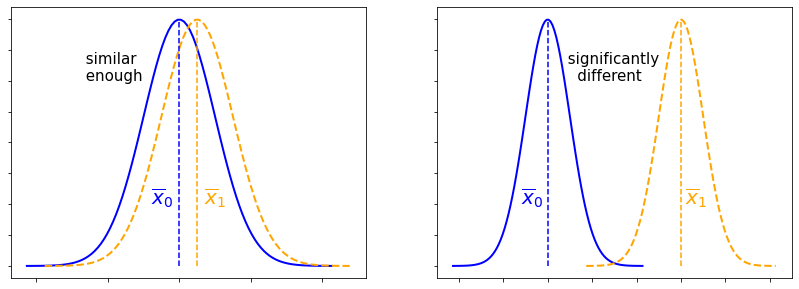

In [31]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
plot_normal_pdf(0,1,"","","",xlim="",linestyle = '-', color='blue')
plot_normal_pdf(0.5,1,"","","",xlim="",linestyle = '--', color='orange')
ax = plt.gca()
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.plot((0,0),(0,0.4),'--',color='blue')
plt.plot((0.5,0.5),(0,0.4),'--',color='orange')
plt.text(-0.8, 0.1, "$\overline{x}_0$",color='blue',fontsize=20)
plt.text(0.7, 0.1, "$\overline{x}_1$",color='orange',fontsize=20)
plt.text(-2.75, 0.3, " similar\n enough",fontsize=15)

plt.subplot(122)
plot_normal_pdf(0,1,"","","",xlim="",linestyle = '-', color='blue')
plot_normal_pdf(6,1,"","","",xlim="",linestyle = '--', color='orange')
ax = plt.gca()
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.plot((0,0),(0,0.4),'--',color='blue')
plt.plot((6,6),(0,0.4),'--',color='orange')
plt.text(-1.2, 0.1, "$\overline{x}_0$",color='blue',fontsize=20)
plt.text(6.2, 0.1, "$\overline{x}_1$",color='orange',fontsize=20)
plt.text(0.7, 0.3, " significantly\n   different",fontsize=15)

plt.show()

> However, as highlighted earlier, a better (better than visual inference) way to compare sample means would be to construct the confidence interval of difference in means. If the two sets of samples are from the same population, then they should have the similar enough means. Their difference should be close to zero and satisfy (or fail to reject) the null hypothesis, $H_0:\bar{x}_0−\bar{x}_1 = 0$, within a range of uncertainty. It is explained below through the following figure:

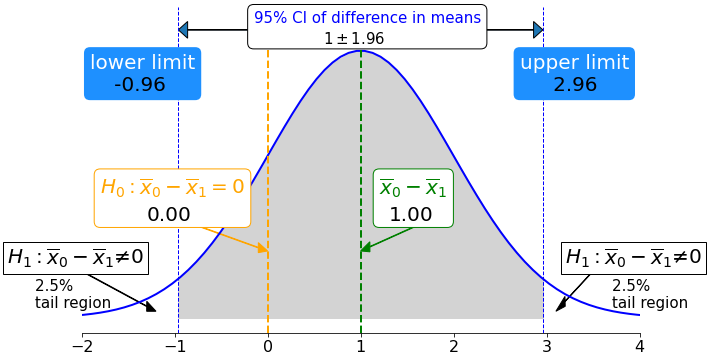

In [32]:
plt.figure(figsize=(10, 6))
xlim = [-2, 4]
plot_normal_pdf(1,1,"","","",xlim=xlim,linestyle = '-', color='blue')
ax = plt.gca()
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])

# Shade 95% confidence interval area
alpha = 1-confidence_level
x_min = norm.ppf(alpha/2,1,1) # Choose a reasonable lower limit
x_max = norm.ppf(confidence_level+(alpha/2),1,1) # Choose a reasonable upper limit
ptx = np.linspace(x_min, x_max, 20)
pty = norm.pdf(ptx,1,1)
plt.fill_between(ptx, pty, color='lightgrey', alpha=1.0) #https://matplotlib.org/2.0.2/examples/color/named_colors.html
plt.axvline(x_min, color='blue',linestyle='--',linewidth=1)
plt.axvline(x_max, color='blue',linestyle='--',linewidth=1)
plt.axvline(1, color='green',linestyle='--',linewidth=2)
plt.axvline(0, color='orange',linestyle='--',linewidth=2)

plt.text(x_min-0.95, 0.34, f"lower limit\n",color='white',fontsize=20,
        bbox=dict(facecolor='dodgerblue', edgecolor='none', boxstyle='round'))
plt.text(x_min-0.9, 0.34, f"   {round(x_min,2)}",fontsize=20)

plt.text(x_max-0.25, 0.34, f"upper limit\n",color='white',fontsize=20,
        bbox=dict(facecolor='dodgerblue', edgecolor='none', boxstyle='round'))
plt.text(x_max-0.1, 0.34, f"   {round(x_max,2)}",fontsize=20)

plt.text(1.2, 0.15, "$\overline{x}_0-\overline{x}_1$\n",color='green',fontsize=20,
        bbox=dict(facecolor='white', edgecolor='green', boxstyle='round'))
plt.text(1.3, 0.145, "1.00",fontsize=20)
plt.arrow(1.8, 0.15, -0.8, -0.05, color='green', head_width=0.015, head_length=0.1, length_includes_head=True)

plt.text(-1.8, 0.15, "$H_0: \overline{x}_0-\overline{x}_1 = 0$\n",color='orange',fontsize=20,
        bbox=dict(facecolor='white', edgecolor='orange', boxstyle='round'))
plt.text(-1.3, 0.145, "0.00",fontsize=20)
plt.arrow(-1, 0.15, 1, -0.05, color='orange',head_width=0.015, head_length=0.1, length_includes_head=True)

plt.text(-2.8, 0.08, "$H_1: \overline{x}_0-\overline{x}_1 ≠ 0$",fontsize=20,
        bbox=dict(facecolor='white', edgecolor='black'))
plt.arrow(-2.8, 0.13, 1.6, -0.12, color='black',head_width=0.015, head_length=0.1, length_includes_head=True)
plt.text(-2.5, 0.015, "2.5% \ntail region",fontsize=15)

plt.text(3.2, 0.08, "$H_1: \overline{x}_0-\overline{x}_1 ≠ 0$",fontsize=20,
        bbox=dict(facecolor='white', edgecolor='black'))
plt.arrow(3.5, 0.07, -0.4, -0.06, color='black',head_width=0.015, head_length=0.1, length_includes_head=True)
plt.text(3.7, 0.015, "2.5% \ntail region",fontsize=15)

plt.arrow(1, 0.43, x_min-1, 0, head_width=0.025, head_length=0.1, length_includes_head=True)
plt.arrow(1, 0.43, x_max-1, 0, head_width=0.025, head_length=0.1, length_includes_head=True)
plt.text(-0.15,0.415,"95% CI of difference in means\n",fontsize=15,color='blue',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round',pad=0.4))
plt.text(0.6,0.41,"$1\pm 1.96$",fontsize=15);


plt.show()

> As shown in the above figure, let us consider for illustration purpose that the difference in sample means is calculated as $\bar{x}_0−\bar{x}_1 = 1$. Furthhermore, consider that the 95\% confidence interval (CI) of the estimator of the difference in means is obtained as [-0.96, 2.96]. Since the null hypothesis, $H_0: \bar{x}_0-\bar{x}_1 = 0$, is within the 95\% CI (grey shaded area), we fail to reject the null hypothesis. So, we can conclude that the two groups of samples have the same means at the significance level of 0.05.

> However, if the null hypothesis is not in the range of CI and falls in the 2.5% tail region in either side, we reject the null hypothesis and accept the alternate hypothesis $H_1: \bar{x}_0-\bar{x}_1 \ne 0$. Then, we conclude that the sample means of the two groups are significantly different. For a significance level of 0.05, we should expect to obtain difference in sample means in the tail region 5% of the time even when the null hypothesis is true. In these cases, we won’t know that the null hypothesis is true but we will reject it because the difference in sample means falls in the critical region.

> #### Three variations of confidence interval of difference in means
>
> When sample sizes of both the sets are moderate or large, then we can use two-sample $t$-test. Let us denote the sample size of one set as $n_0$ with sample variance given by $s^2_0$, while the other set has sample size, $n_1$, with sample variance given by $s^2_1$. Depending on conditions, there are three variations of two-sample $t$-test that also imply three variations of confidence interval for difference in means. More details about the three variations can be found in [Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-test). Different conditions of the three variattions are highlighted below:
>
> 1. (**student's $t$-test**). Independent two-sample $t$-test for equal or unequal sample sizes with similar variances ${\displaystyle\left(\frac{1}{2} < \frac{s_0}{s_1} < 2\right)}$
> 2. (**Welch's $t$-test**). Independent two-sample $t$-test for equal or unequal sample sizes with unequal variances ${\displaystyle\left(s_0 > 2s_1\mbox{ or } s_1 > 2s_0\right)}$
> 3. Dependent $t$-test for paired samples
> 
> All $t$-tests are based on normality of data. The student's $t$-test provides an exact test for the equality of the means of two independent and identically distributed (i.i.d.) normal populations with unknown, but equal, variances. The Welch's $t$-test is a nearly exact test for the case where the data are normal but the variances may differ. For moderately large samples and a one tailed test, [the $t$-test is relatively robust to moderate violations of the normality assumption](https://doi.org/10.1037/0033-2909.111.2.352). In large enough samples, the $t$-test asymptotically approaches the $z$-test because of CLT, and becomes robust even to large deviations from normality (we have already seen it in both exercises -- Part A earlier and Part B above). Finally, if the data are substantially non-normal and the sample size is small, the $t$-test can give misleading results (we also obsrerved it earlier in Part A and Part B above). 
>
> Our current data of medical expenses are non-normal but we have large enough data (combined data). We need to make sure that this holds true for each individual sample set. Per problem statement of Q4, we would use the pooled standard deviation of the two sets of samples, rather than using standard deviation of each set of sample. **It means that we would use student's $t$-test. In other words, we are assuming here that the two sets of samples (one for the people with insurance and the other without insurance) have nearly equal variances, i.e., similar variances**.
>
> The expression of the pooled standard deviation, $s_p$, given above is related to an weighted average of (Bessel-corrected) sample variances of two groups of samples. Since student's $t$-test assumes same variances for both the sets of samples, the common variance (i.e., the pooled variance, $s^2_p$) is obtained by a weighted average of sample variance of each group as given in the problem statement of Q4. The expression of $t$-statistic is also given in the problem statement of Q4. Given this expression, the confidence interval (CI) of difference in mean, per student's $t$-test, can be computed as follows:
\begin{equation}
    CI_{\bar{x}_0−\bar{x}_1}:\left[(\bar{x}_0−\bar{x}_1) - \left(t_{1−\frac{\alpha}{2},df}\,\,s_{p}\sqrt{\frac{1}{n_0}+\frac{1}{n_1}}\right), (\bar{x}_0−\bar{x}_1) + \left(t_{1−\frac{\alpha}{2},df}\,\,s_{p}\sqrt{\frac{1}{n_0}+\frac{1}{n_1}}\right)\right]
\end{equation}
> where,
> > $\alpha$ : significance level\
> > $df$ : degrees of freedom of the $t$-distribution\
> > $t_{1−\frac{\alpha}{2},df}$ : $t$-score that depends on $\alpha$ and degrees of freedom of the $t$-distribution
>
> The degrees of freedom, $df$, of the $t$-distribution for student's $t$-test is given by
\begin{equation}
    df=n_0+n_1−2
\end{equation}
>
> Note that the above hypothesis test and the computation of CI check if the mean of one group is **significantly different** from the mean of the other group. This is a two-tailed test.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

> __A5:__ Please see below.

Sample size without insurance: 555
Sample size with insurance: 783


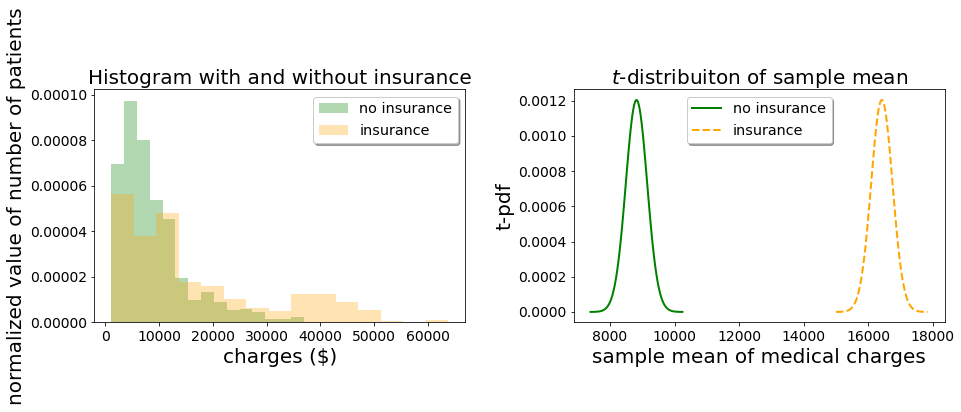

In [33]:
# Sample set 1 for medical charges without insurance
x0 = medical["charges"].loc[medical['insuranceclaim'] == 0]

# Sample set 2 for medical charges with insurance
x1 = medical["charges"].loc[medical['insuranceclaim'] == 1]

n0, n1 = len(x0), len(x1)                                    # sample sizes
print(f"Sample size without insurance: {n0}")
print(f"Sample size with insurance: {n1}")
var0, var1 = np.var(x0, ddof=1), np.var(x1, ddof=1)         # sample variances

figure = plt.figure(figsize=(14, 5))

plt.subplot(121)
bins = 15
xlabel = f"charges ($)"
ylabel = f"normalized value of number of patients"
title = f"Histogram with and without insurance"
legend_loc = 'upper right'
plt.hist(x0, bins=bins, density=True, facecolor='green', alpha = 0.3, label='no insurance')
plt.hist(x1, bins=bins, density=True, facecolor='orange', alpha = 0.3, label='insurance')
plt.xlabel(xlabel,fontsize=20)
plt.ylabel(ylabel,fontsize=20)
plt.title(title,fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
legend = plt.legend(loc=legend_loc, shadow=True, fontsize='x-large')

plt.subplot(122)
# Plot seperate t-distributions of sample mean with insurance and without insurance
xlabel = f"sample mean of medical charges"
ylabel = f"t-pdf"
title = f"$t$-distribuiton of sample mean"
legend_loc = 'upper center'
# Plot the t-distribution of test statistic
plot_t_distribution_pdf(n0-1,np.mean(x0),np.std(x0,ddof=1)/np.sqrt(n0),color="green",linestyle="-")
plot_t_distribution_pdf(n1-1,np.mean(x1),np.std(x1,ddof=1)/np.sqrt(n1),color="orange",linestyle="--")
plt.xlabel(xlabel,fontsize=20)
plt.ylabel(ylabel,fontsize=20)
plt.title(title,fontsize=20)
plt.legend(['no insurance', 'insurance'],loc=legend_loc,shadow=True, fontsize='x-large')

figure.tight_layout(pad=3.0)


> First, **we note that the sample size of both groups (charge to patients with insurance and without insurance) are large (more than 100). So, $t$-test would provide reliable results**. Both the histogram plot and $t$-distribution plot above show that the patients with insurance are charged significantly more than those without insurance. In other wordds, the sample means of the two groups, and thus, the distributions of medical expenses for people with insurance and that without insurance, are significantly different.
>
> We will now focus on formal two-sample $t$-test to see if the null hypothesis, $H_0: \bar{x}_0-\bar{x}_1 = 0$, is in the 95% CI of difference in means or falls in the 2.5% tail region in either side.

Confidence level: 0.95
Level of significance: 0.05
	Difference in sample means: -7602.51
	Corresponding standard error: 639.23
	95% CI of difference in mean using standardized t-score: (-8856.5024, -6348.5103)
	95% CI of difference in mean using general t.interval: (-8856.5024, -6348.5103)



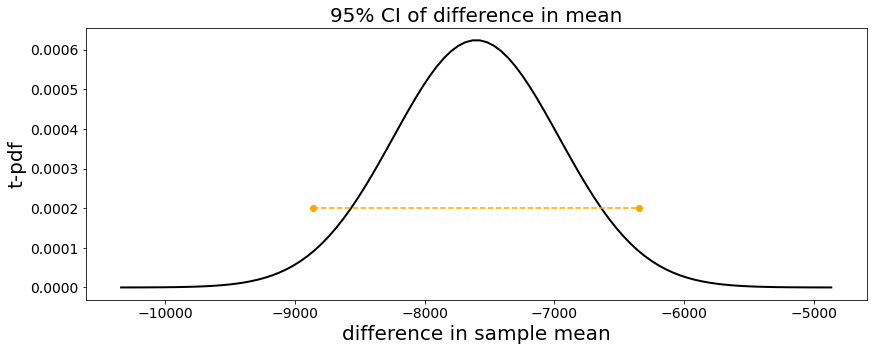

In [34]:
alpha = 1 - confidence_level                                # significance level = 5%
print(f"Confidence level: {round(confidence_level,2)}")
print(f"Level of significance: {round(alpha,2)}")
      
var0, var1 = np.var(x0, ddof=1), np.var(x1, ddof=1)         # sample variances
sp = np.sqrt(( ((n0 - 1) * var0) + ((n1 - 1) * var1) ) / (n0 + n1 - 2)) # pooled standard deviation
df = n0 + n1 - 2                                            # degrees of freedom
t_score = t.ppf(1 - alpha/2, df)                            # t-score value
SE = sp*np.sqrt((1 / n0) + (1 / n1))                        # Standard error
ME = t_score*SE                                             # Margin of error
difference_in_mean = np.mean(x0) - np.mean(x1)
print(f"\tDifference in sample means: {round(difference_in_mean,2)}")
print(f"\tCorresponding standard error: {round(SE,2)}")
CI = (difference_in_mean - ME, difference_in_mean + ME)
print(f"\t{int(confidence_level*100)}% CI of difference in mean using standardized t-score: {(round(CI[0],4),round(CI[1],4))}")
CI = t.interval(alpha=confidence_level, df=df, loc=difference_in_mean, scale=SE)
print(f"\t{int(confidence_level*100)}% CI of difference in mean using general t.interval: {(round(CI[0],4),round(CI[1],4))}")
print()

figure = plt.figure(figsize=(14, 5))
xlabel = 'difference in sample mean'
ylabel = 't-pdf'
title = f"{int(confidence_level*100)}% CI of difference in mean"
# Plot the t-distribution
plot_t_distribution_pdf(df,difference_in_mean,SE,xlabel,ylabel,title);
# Superimpose the confidence interval 
plot_confidence_interval(0.0002,CI[0],CI[1])


> We see that the null hypothesis, $H_0: \bar{x}_0-\bar{x}_1 = 0$, is **not** in the 95% CI and **falls in the 2.5% right tail region**. We, therefore, **reject the null hypothesis**, and conclude that the sample means of the two groups are significantly different. In other words, we can advise the administrator that **people with insurance are really charged significantly different amount from those without**.
>
> In the following, let us also estimate the value of test statistic (as it was particularly asked in Q5) and its probability (i.e, p-value) to formally come to the same conclusions for the sake of completeness.

In [35]:
# Compute and print the value of student's  t-test statistic
test_statistic = difference_in_mean/SE
print(f"\tValue of student's t-test statistic: {test_statistic}")

# Compute and print the value of p-value
pvalue = 2*t.sf(test_statistic, df, loc=difference_in_mean, scale=SE) # two-tailed test
print(f"\tp-value of test statistic: {pvalue}")



	Value of student's t-test statistic: -11.89329903087671
	p-value of test statistic: 5.456409475795063e-31


> The computed `pvalue=5.456409475795063e-31` is almost zero and less than the significance level of $\alpha = 0.05$. Therefore, we formally reject the null hypothesis $H_1: \bar{x}_0-\bar{x}_1 \ne 0$, which is consistent with the conclusion drawn above from the confidence interval of difference in mean.

> We can confirm the above results of test statistic and p-value by using `scipy.stats.ttest_ind()` that employs hypothesis testing. We set here`equal_var=True` to invoke student's $t$-test (not Welch's $t$-test) because we relied on pooled variance assuming that the two sets of samples (one for the people with insurance and the other without insurance) have nearly equal variances, i.e., similar variances.

In [36]:
test_statistic, pvalue = ttest_ind(x0, x1, equal_var=True)
print(f"\tValue of student's t-test statistic: {test_statistic}")
print(f"\tp-value of test statistic: {pvalue}")

	Value of student's t-test statistic: -11.893299030876712
	p-value of test statistic: 4.461230231620717e-31


> The values of test statistic from `ttest_ind()` and our direct calculation in the previous cell match. Even though the computed values of p-value are slightly different, both the p-values are extremely small and are almost zero. And, our conclusion of rejecting null hypothesis remain valid.

> Finally, note here that **student's $t$-test, in general, works quite well even with unequal variances as long as sample sizes reasonably large**. However, it is typically recommended to always use **Welch's $t$-test** by assuming unequal variances to obtain more accurate results since we will never know in practice if the population variances of two groups are similar or not. In conclusion, we perform Welch's $t$-test simply by using `equal_var=False`.

In [37]:
test_statistic, pvalue = ttest_ind(x0, x1, equal_var=False)
print(f"\tValue of Welch's t-test  statistic using scipy.stats.ttest_ind(): {round(test_statistic,4)}")
print(f"\tp-value of test statistic: {pvalue}")

	Value of Welch's t-test  statistic using scipy.stats.ttest_ind(): -13.298
	p-value of test statistic: 1.1105103216309125e-37


In [38]:
# Directly compute and print the value of Welch's t-test statistic for verification
# See https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test
SE = np.sqrt((var0 / n0) + (var1 / n1))
test_statistic = difference_in_mean/SE
print(f"\tValue of Welch's t-test  statistic (direct computation): {round(test_statistic,4)}")

# Compute and print the value of p-value
pvalue = 2*t.sf(test_statistic, df, loc=difference_in_mean, scale=SE) # two-tailed test
print(f"\tp-value of test statistic (direct computation): {pvalue}")

	Value of Welch's t-test  statistic (direct computation): -13.298
	p-value of test statistic (direct computation): 7.232736404045905e-38


> The Welch's t-test statistic match perfectly, while the estimated `pvalue` in both the cases (direct computation and `scipy.stats.ttest_ind()`) are almost zero and less than the significance level of $\alpha = 0.05$. We, therefore, reject again the null hypothesis $H_1: \bar{x}_0-\bar{x}_1 \ne 0$, to conclude that the two sample means are significantly different implying that that **people with insurance are charged significantly different amount from those without**.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

> __A6:__ The [documentation page](https://docs.scipy.org/doc/scipy/reference/stats.html#) of scipy.stats includes a function `scipy.stats.ttest_1samp()`. This is a test for the null hypothesis that the expected value (mean) of a sample of independent observations $a$ is equal to a given population mean, $popmean$.
> There is also a similar function `scipy.stats.normaltest()`. This function tests the null hypothesis that a sample comes from a normal distribution.
>
> We also remark here that like `scipy.stats.ttest_ind()` function, that can be usedd as a student's $t$-test or Welch's $t$-test, a similar test exist for [two-sample $z$-test](https://www.cliffsnotes.com/study-guides/statistics/univariate-inferential-tests/two-sample-z-test-for-comparing-two-means) to compare the two means of the two groups of samples.  This test can be applied to normally distributed two sets of independent samples with equal or unequal sample sizes and with equal or unequal **known** variances (similar to Welch's $t$-test). The $z$-statistic is given by,

\begin{equation}
    z = \displaystyle\frac{\bar{x}_0 - \bar{x}_1 - \Delta}{\sqrt{\displaystyle\frac{\sigma_0^2}{n_0} + \frac{\sigma_1^2}{n_1}}}
\end{equation}
> Here, $\Delta$ is the hypothesized difference between the population means (0 if testing for equal means), $\sigma_0$ and $\sigma_1$ are the two **known** standard deviations of the two populations.
>
> In practice, the two‐sample $z$‐test cannot be readily applied, because the two population standard deviations, $\sigma_0$ and $\sigma_1$, are unknown. If we use sample variance as estimates of $\sigma_0$ and $\sigma_1$, then two‐sample $z$‐test would be meaningful when both the sample sizes are large. As we have seen earlier for one-sample $z$-test and $t$-test, the two‐sample $z$‐test and two‐sample $t$‐test (such as`scipy.stats.ttest_ind()`) will produce similar results provided sample sizes are reasonably large. Nevertheless, two‐sample $t$‐test with sample standard deviations are mostly used in practice.
>
> In the following, we can quickly check if the two‐sample $z$‐test along with sample standard deviations (as estimates of $\sigma_0$ and $\sigma_1$) produce similar results to the results of Welch's $t$-test that we performed above. Please note that the $z$-test statistic (with $\Delta=0$ because we are testing for equal means) and Welch's $t$-test statistic are precisely same. Only the numerical value of p-value will be different because  we need to use normal distribution (instead of student's $t$ distribution).

In [39]:
print(f"\tValue of two-sample z-test  statistic (direct computation): {round(test_statistic,4)}")

# Compute and print the value of p-value
pvalue = 2*norm.sf(test_statistic, loc=difference_in_mean, scale=SE) # two-tailed test
print(f"\tp-value of test statistic (direct computation): {pvalue}")

	Value of two-sample z-test  statistic (direct computation): -13.298
	p-value of test statistic (direct computation): 3.2425861420281422e-40


> As expected, the estimated `pvalue` is almost zero and less than the significance level of $\alpha = 0.05$. So, we reject the null hypothesis $H_1: \bar{x}_0-\bar{x}_1 \ne 0$ to conclude that the two sample means are significantly different. Thus, **the two-sample $t$-test and $z$-test provide similar results**.
>
> Note that **there is no statistical test function in scipy.stats for two‐sample $z$‐test** simply because two‐sample $z$‐test cannnot be used in practice unless we are **absolutely** sure of the precise values of the two population standard deviations (theoretically speaking).

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test